In [39]:
import pandas as pd

data = pd.read_csv('Tayara_v2.csv')

# Check for missing values
print(data.head())

# Check data types and general information
print(data.info())


      Région    Nature  Superficie  Nb_Salles De bain Nb_Chambres      Prix  \
0  Ben Arous  À Vendre       550.0                5.0          12  800000.0   
1  Ben Arous  À Vendre       206.0                4.0           8  650000.0   
2  Ben Arous  À Vendre       383.0                3.0           6  550000.0   
3     Nabeul  À Vendre       197.0                1.0           2  240000.0   
4     Ariana  À Vendre       300.0                3.0           3  960000.0   

  Date_De_Modification                                      Texte Annonce  
0                  NaN  MAXULA IMMOBILIERE vous propose à la VENTE un ...  
1                  NaN  MAXULA IMMOBILIERE vous propose à la VENTE un ...  
2                  NaN  MAXULA IMMOBILIERE vous propose à la VENTE un ...  
3                  NaN  A vendre une belle maison S+2 située aux envir...  
4                  NaN  On vous propose La Vente d'une charmante villa...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 

In [40]:
# Convert "Prix" to numeric (remove special characters)
data['Prix'] = data['Prix'].replace('[^0-9]', '', regex=True).astype(float)

# Convert "Superficie" to numeric (handle N/A values)
data['Superficie'] = pd.to_numeric(data['Superficie'], errors='coerce')

# Convert "Nb_Salles De bain" to numeric (handle N/A values)
data['Nb_Salles De bain'] = pd.to_numeric(data['Nb_Salles De bain'], errors='coerce')

# Convert "Nb_Pieces" to numeric (handle N/A values)
data['Nb_Chambres'] = pd.to_numeric(data['Nb_Chambres'], errors='coerce')

# Drop irrelevant columns (optional)
data.drop(['Date_De_Modification'], axis=1, inplace=True)

# Drop rows with missing natue not sale
data.dropna(subset=['Nature'], inplace=True)

# # List of sub-regions of Grand Tunis
# subregions = ['La Marsa', 'Carthage', 'Sidi Bou Saïd', 'Soukra', 'Lac', 'Mutuelleville', 
#               'Ennasr', 'Cité Olympique', 'Menzah', 'Manar', 'El Ghazela', 
#               'Bhar Lazreg', 'Chotrana', 'Aouina']

# # Function to extract sub-regions from "Texte Annonce"
# def extract_subregions(description, subregions_list):
#     """Extracts all sub-regions from a text based on a list of sub-regions."""
#     if not isinstance(description, str):  # Check if the value is a string
#         return None
#     found_subregions = [subregion for subregion in subregions_list if subregion.lower() in description.lower()]
#     return found_subregions if found_subregions else None

# # Fill NaN values with an empty string
# data['Texte Annonce'] = data['Texte Annonce'].fillna('')

# # Apply the function to the DataFrame and create a new 'Subregion' column
# data['Subregion'] = data['Texte Annonce'].apply(lambda x: extract_subregions(x, subregions))

# print(data['Subregion'].head())
# print(data['Subregion'].tail())

In [41]:
# Summary statistics for numerical columns
print(data.describe())

# Summary statistics for categorical columns
print(data['Région'].value_counts())
print(data['Nature'].value_counts())
# print(data['Subregion'].value_counts())

         Superficie  Nb_Salles De bain  Nb_Chambres          Prix
count  2.710000e+03        2711.000000  2735.000000  2.853000e+03
mean   4.822017e+03           2.140391     3.586143  6.181122e+06
std    2.141072e+05           8.498956     8.717520  1.187040e+08
min   -1.000000e+02          -1.000000    -2.000000 -3.000000e+00
25%    1.000000e+02           1.000000     2.000000  8.000000e+04
50%    1.500000e+02           1.000000     3.000000  2.700000e+05
75%    3.450000e+02           2.000000     4.000000  5.200000e+05
max    1.111111e+07         280.000000   335.000000  4.200000e+09
Région
Tunis          840
Ariana         513
Ben Arous      440
Nabeul         406
Sousse         262
Sfax           113
Bizerte         75
La Manouba      63
Monastir        44
Médenine        28
Mahdia          19
Kairouan        14
Le Kef           9
Gabès            8
Béja             7
Zaghouan         5
Gafsa            5
Jendouba         5
Kasserine        2
Siliana          1
Sidi Bouzid      1


C:\Users\amine\AppData\Local\Temp\ipykernel_16740\1298098574.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Région', data=data, order=data['Région'].value_counts().index, palette='viridis')


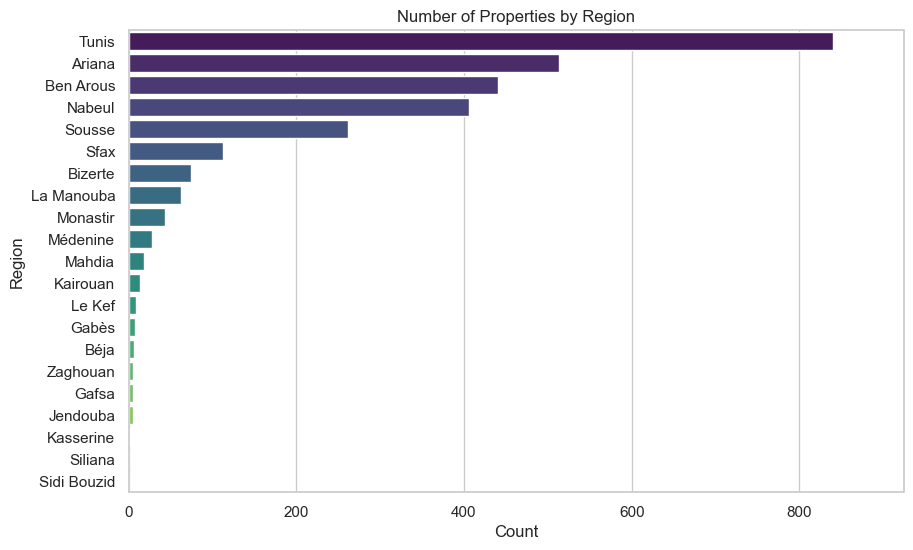

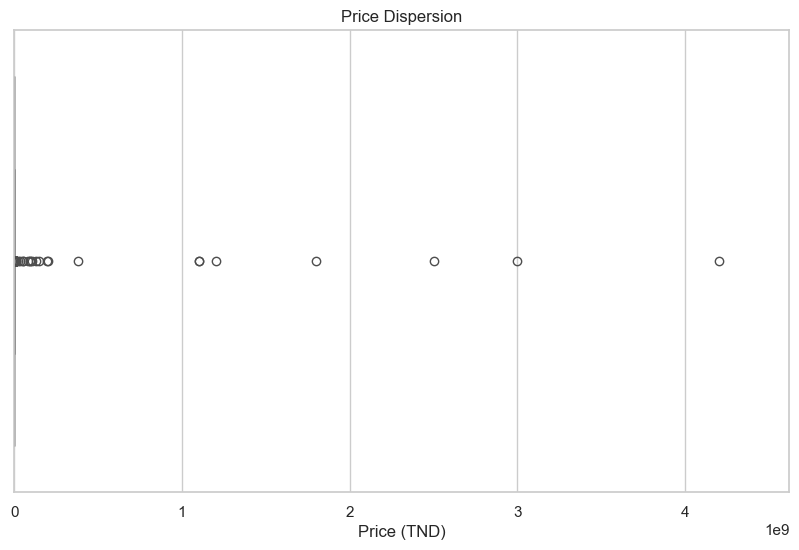

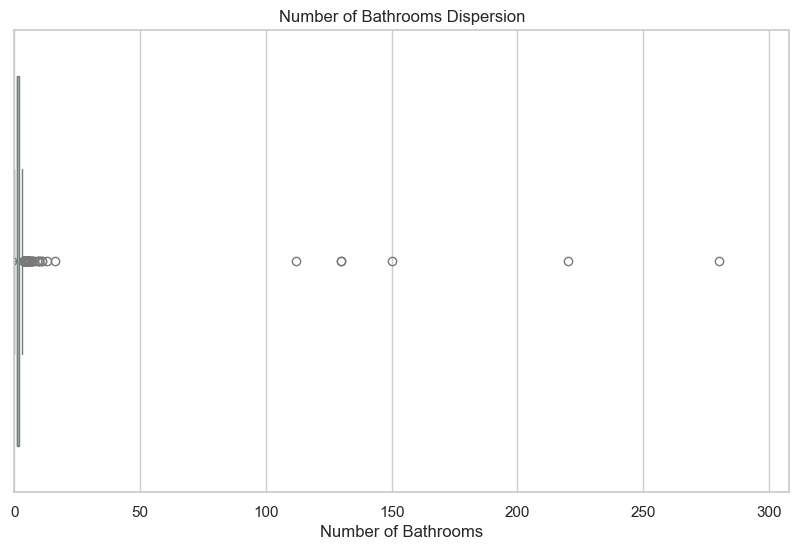

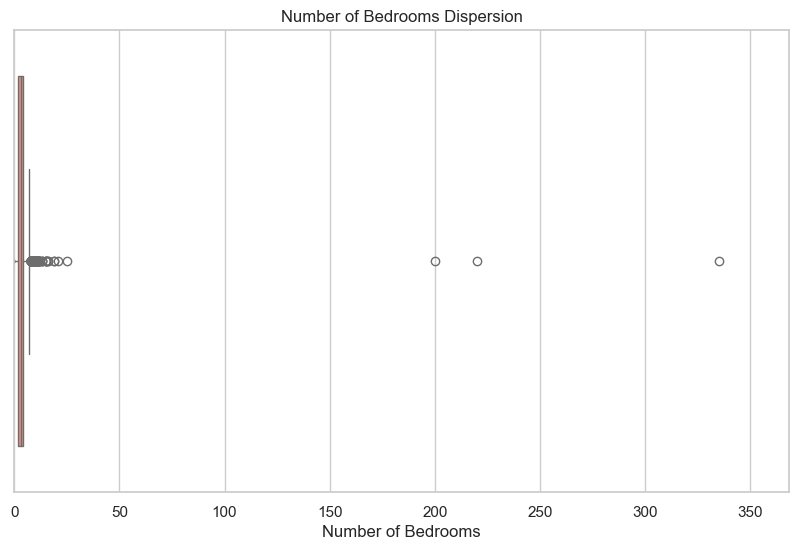

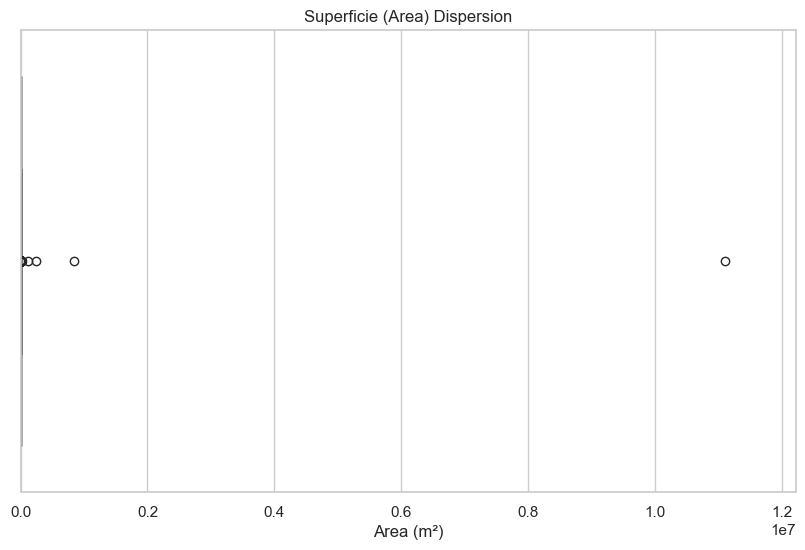

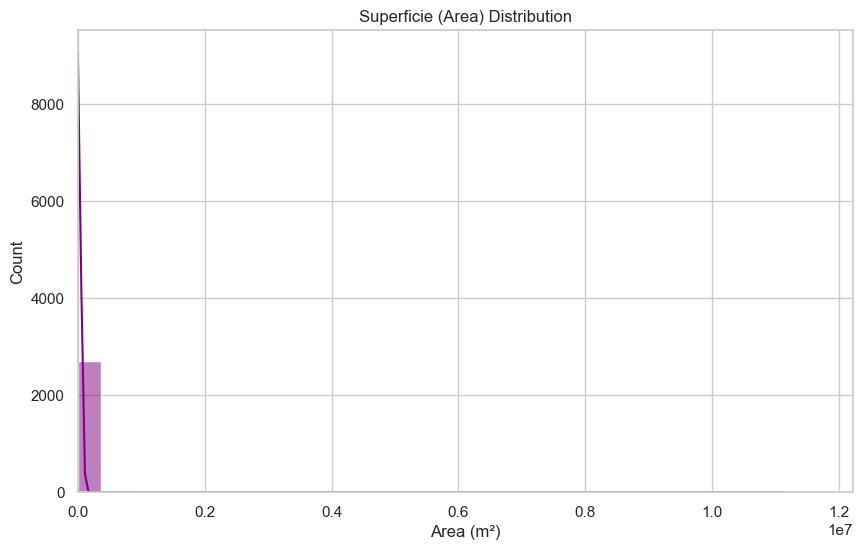

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style="whitegrid")

# 1. Bar Plot for Region Count
plt.figure(figsize=(10, 6))
sns.countplot(y='Région', data=data, order=data['Région'].value_counts().index, palette='viridis')
plt.title('Number of Properties by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.xlim(0, data['Région'].value_counts().max() * 1.1)  # 10% padding
plt.show()

# 2. Box Plot for Prix
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Prix'], color='orange')
plt.title('Price Dispersion')
plt.xlabel('Price (TND)')
plt.xlim(0, data['Prix'].max() * 1.1)  # 10% padding
plt.show()

# 3. Box Plot for Nb_Salles De bain
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Nb_Salles De bain'], color='lightblue')
plt.title('Number of Bathrooms Dispersion')
plt.xlabel('Number of Bathrooms')
plt.xlim(0, data['Nb_Salles De bain'].max() * 1.1)  # 10% padding
plt.show()

# 4. Box Plot for Nb_Chambres
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Nb_Chambres'], color='salmon')
plt.title('Number of Bedrooms Dispersion')
plt.xlabel('Number of Bedrooms')
plt.xlim(0, data['Nb_Chambres'].max() * 1.1)  # 10% padding
plt.show()

# 5. Box Plot for Superficie
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Superficie'], color='green')
plt.title('Superficie (Area) Dispersion')
plt.xlabel('Area (m²)')
plt.xlim(0, data['Superficie'].max() * 1.1)  # 10% padding
plt.show()

# 6. Histogram for Superficie
plt.figure(figsize=(10, 6))
sns.histplot(data['Superficie'], kde=True, color='purple', bins=30)
plt.title('Superficie (Area) Distribution')
plt.xlabel('Area (m²)')
plt.xlim(0, data['Superficie'].max() * 1.1)  # 10% padding
plt.show()


Moyenne : 6181121.938612338, Médiane : 270000.0, Écart-type : 118703996.15065509
                       Prix  Nature_Encoded  Nb_Chambres  Nb_Salles De bain  \
Prix               1.000000        0.006456     0.024697           0.009690   
Nature_Encoded     0.006456        1.000000     0.012215           0.004498   
Nb_Chambres        0.024697        0.012215     1.000000           0.257938   
Nb_Salles De bain  0.009690        0.004498     0.257938           1.000000   
Superficie        -0.001003        0.003298    -0.000782          -0.002319   
Région_Encoded     0.026144       -0.050626    -0.029433          -0.026086   

                   Superficie  Région_Encoded  
Prix                -0.001003        0.026144  
Nature_Encoded       0.003298       -0.050626  
Nb_Chambres         -0.000782       -0.029433  
Nb_Salles De bain   -0.002319       -0.026086  
Superficie           1.000000       -0.023362  
Région_Encoded      -0.023362        1.000000  


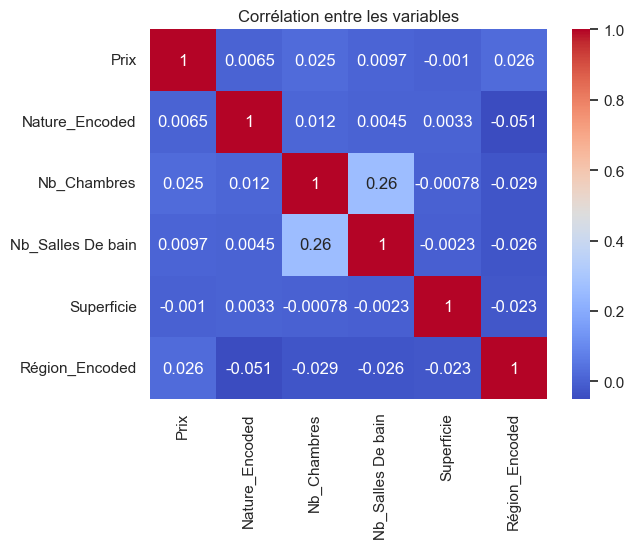

In [46]:
mean_price = data['Prix'].mean()
median_price = data['Prix'].median()
std_price = data['Prix'].std()
print(f"Moyenne : {mean_price}, Médiane : {median_price}, Écart-type : {std_price}")


# Encodage des colonnes catégoriques (si pertinent)
data['Nature_Encoded'] = data['Nature'].astype('category').cat.codes
data['Région_Encoded'] = data['Région'].astype('category').cat.codes

# Corrélation entre Nature, Type et Prix
correlations = data[['Prix', 'Nature_Encoded','Nb_Chambres' , 'Nb_Salles De bain' , 'Superficie','Région_Encoded']].corr()
print(correlations)

# Heatmap pour visualiser
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Corrélation entre les variables")
plt.show()

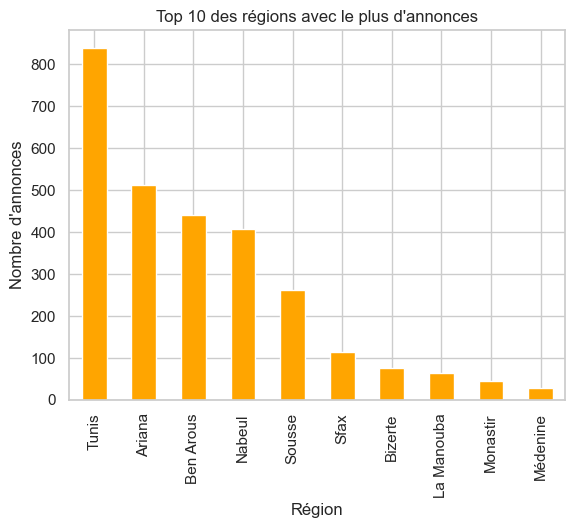

In [44]:
top_regions = data['Région'].value_counts().head(10)
top_regions.plot(kind='bar', color='orange')
plt.title("Top 10 des régions avec le plus d'annonces")
plt.ylabel("Nombre d'annonces")
plt.show()